In [173]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [174]:
# Reading CSV files into dataframes
daily_activity_df = pd.read_csv("dailyActivity_merged (1).csv")
fitbit_df = pd.read_csv("FitBit data.csv")

#check DataFrames 
daily_activity_df.head()
fitbit_df.head
  

<bound method NDFrame.head of              Id ActivityDate  TotalSteps  TotalDistance  TrackerDistance  \
0    1503960366    3/25/2016       11004       7.110000         7.110000   
1    1503960366    3/26/2016       17609      11.550000        11.550000   
2    1503960366    3/27/2016       12736       8.530000         8.530000   
3    1503960366    3/28/2016       13231       8.930000         8.930000   
4    1503960366    3/29/2016       12041       7.850000         7.850000   
..          ...          ...         ...            ...              ...   
452  8877689391   04/08/2016       23014      20.389999        20.389999   
453  8877689391   04/09/2016       16470       8.070000         8.070000   
454  8877689391   04/10/2016       28497      27.530001        27.530001   
455  8877689391   04/11/2016       10622       8.060000         8.060000   
456  8877689391   04/12/2016        2350       1.780000         1.780000   

     LoggedActivitiesDistance  VeryActiveDistance  Modera

In [175]:
fitbit_df.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,3/25/2016,11004,7.11,7.11,0.0,2.57,0.46,4.07,0.0,33,12,205,804,1819
1,1503960366,3/26/2016,17609,11.55,11.55,0.0,6.92,0.73,3.91,0.0,89,17,274,588,2154
2,1503960366,3/27/2016,12736,8.53,8.53,0.0,4.66,0.16,3.71,0.0,56,5,268,605,1944
3,1503960366,3/28/2016,13231,8.93,8.93,0.0,3.19,0.79,4.95,0.0,39,20,224,1080,1932
4,1503960366,3/29/2016,12041,7.85,7.85,0.0,2.16,1.09,4.61,0.0,28,28,243,763,1886


In [176]:
#Print the column names
print(daily_activity_df.columns)
print(fitbit_df .columns)   

Index(['Id', 'ActivityDate', 'TotalSteps', 'TotalDistance', 'TrackerDistance',
       'LoggedActivitiesDistance', 'VeryActiveDistance',
       'ModeratelyActiveDistance', 'LightActiveDistance',
       'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes',
       'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories'],
      dtype='object')
Index(['Id', 'ActivityDate', 'TotalSteps', 'TotalDistance', 'TrackerDistance',
       'LoggedActivitiesDistance', 'VeryActiveDistance',
       'ModeratelyActiveDistance', 'LightActiveDistance',
       'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes',
       'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories'],
      dtype='object')


In [177]:
#merging the DataFrames
merged_df = pd.concat([daily_activity_df, fitbit_df], ignore_index=True)
merged_df.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [178]:
# Print the number of rows in the merged dataset
print("merged_df:", len(merged_df))

merged_df: 1397


In [179]:
# find the duplicate rows by  ID, activity date and total distance
duplicate_df = merged_df[merged_df.duplicated(subset=["Id", "ActivityDate", "TotalSteps"])]

# Remove duplicates from the original data based on specific columns
cleaned_data = merged_df.drop_duplicates(subset=['Id', 'ActivityDate', 'TotalSteps'])

duplicate_df.to_csv("duplicates.csv", index=False)
cleaned_data.to_csv("cleaned_data.csv", index=False)

In [180]:
## look at data 
cleaned_data.head()
## export as an excel file 
cleaned_data.to_excel("cleaneddata.xlsx",)

In [181]:
### check cleaned data size
count_rows = len(cleaned_data)
print(count_rows)
## check number of participants 
count_ID = len(pd.unique(cleaned_data['Id']))
print(count_ID)

1397
35


In [182]:
##START OF AISLING'S PART
#Extract relevant columns for my tests
activity_levels = cleaned_data[["Id","TotalSteps","VeryActiveMinutes","FairlyActiveMinutes", "LightlyActiveMinutes", "SedentaryMinutes"]]
activity_levels.head()
activity_levels.to_excel("activity_levels.xlsx",)

### Intro: The 10,000 step goal by Aisling Geraghty

Fitbit advertises 10,000 steps as the goal all users should seek to attain daily. By purchasing a fitbit, users are choosing to engage with a fitness tool that measures their steps as a form of activity. Here we look at how users performed with regards to the 10,000 steps daily goal that is encouraged by fitbit. The use of steps as a metric is then further explored by breaking step ranges into activity levels, whereby the distribution of users is explored by their average step activity. Using chi-squared, the variation of users by step activity is tested for statistical significance. 

Through this analysis we are looking to discover the appropriateness of the 10,000 steps goal, how achievable was it? We are looking to see if there is an even spread of user types within the sample, or whether those purchasing a fitbit favoured a specific range of steps. Lastly, we will compare the activity levels by step of this sample size with results from the Australian Bureau of Statistics, to see how those who have chosen to measure their steps compare in activity with the general population. 


In [185]:
### Part 1
### HOW MANY REACHED THE GOAL OF 10,000 STEPS, AND WHAT WERE THE AVERAGE STEPS 
goal_reached = activity_levels.loc[activity_levels["TotalSteps"] >= 10000, ["Id", "TotalSteps"]]
goal_reached.head()
count_reached = len(goal_reached)
print(count_reached)
goal_reached


430


,Id,TotalSteps
0,1503960366,13162
1,1503960366,10735
2,1503960366,10460
4,1503960366,12669
6,1503960366,13019
...,...,...
1391,8877689391,10910
1392,8877689391,23014
1393,8877689391,16470
1394,8877689391,28497


In [186]:
## percentage of entrees that met this goal 
##RESULT 1
successful_days = f"{430/1397:.0%}"
print(successful_days)

31%


In [187]:
###number of individuals reaching goal 
no_individuals = len(pd.unique(goal_reached['Id']))
no_individuals 


26

In [188]:
##RESULT 2
###percentage of participants that reached the 10,000 steps goal 
percentage_participants = f"{26/35:0%}"
print(percentage_participants)


74.285714%


In [189]:
##Result 3
##Average steps of users
average_steps_overall = activity_levels['TotalSteps'].mean()
print(average_steps_overall)


7280.898353614889


In [190]:
#### results table 

steps_results = {
    'Percentage of time goal was met': [successful_days],
    'Percentage of participants that reached goal': [percentage_participants],
    'Average steps taken' : [average_steps_overall],
}

steps_results

steps_table = pd.DataFrame(data=steps_results)
steps_table 


,Percentage of time goal was met,Percentage of participants that reached goal,Average steps taken
0,31%,74.285714%,7280.898354


Notation:
This results table extracts some key findings. 31% of entrees achieved the 10,000 step goal. This is a substantial enough number that presents the goal as relatively achievable. Furthermore, 74% of participants reached the goal at least once, showing that a majority of users rose to the challenge. 
On average, the total steps of users was still high, falling short of 10,000 by 2720 steps. Given that the data was accumulated over a short timeframe, the gap between the average steps taken, and fitbit's goal, could likely be closed by the majority of users, if given more time to interact with the tool. 

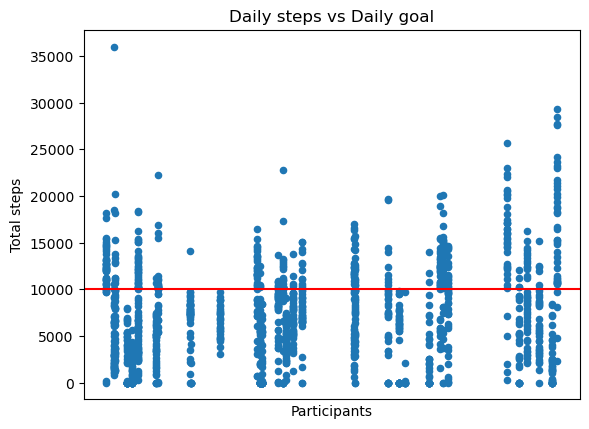

In [209]:
###Part 2 graph building 
import matplotlib.pyplot as plt

activity_levels.plot.scatter(x='Id', y='TotalSteps')
plt.axhline(y = 10000, color = 'r', linestyle = '-')
plt.xlabel('Participants')
plt.ylabel('Total steps')
plt.title('Daily steps vs Daily goal')
plt.tick_params(labelbottom = False, bottom = False)





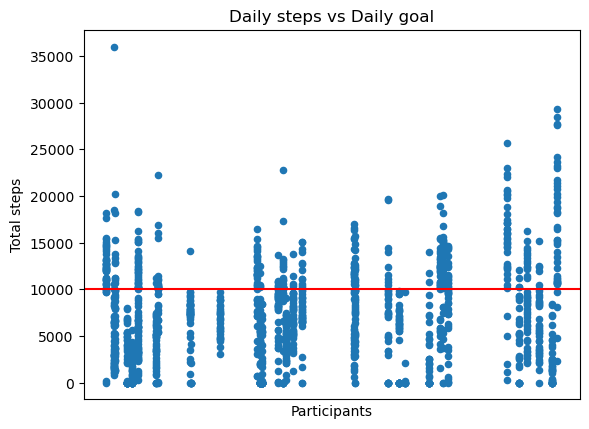

In [209]:
###Part 2 graph building 
import matplotlib.pyplot as plt

activity_levels.plot.scatter(x='Id', y='TotalSteps')
plt.axhline(y = 10000, color = 'r', linestyle = '-')
plt.xlabel('Participants')
plt.ylabel('Total steps')
plt.title('Daily steps vs Daily goal')
plt.tick_params(labelbottom = False, bottom = False)





In [ ]:
###Part 2 graph building 
import matplotlib.pyplot as plt

activity_levels.plot.scatter(x='Id', y='TotalSteps')
plt.axhline(y = 10000, color = 'r', linestyle = '-')
plt.xlabel('Participants')
plt.ylabel('Total steps')
plt.title('Daily steps vs Daily goal')
plt.tick_params(labelbottom = False, bottom = False)
plt.show()




Analysis

This graph shows the daily step entrees of each participant, and a threshold line for the 10,000 steps goal. The data shows huge variation in the daily steps of users, as well as clear incidents of abnormal levels of activity, such as the entry of over 35000 steps for one day. The entries are more clustered and dense beneath the 10,000 mark, which is where 79% of entries are situated. 

From the spread of data, it is clear that users showed variation in their activity levels, and that most users achieved the goal at least once. 
Given that 31% of entrees reached the goal, it is clear the goal is achievable but not easy. The achievable nature is substantiated by the majority reaching, and/or exceeding the goal at least once within a short study.

Given that the 10,000 step goal is 2720 steps above the average, it poses itself as a challenge that is not out of reach to obtain, but seemingly difficult to maintain. 

In [40]:
##### PART 2 Graphical depiction 
### Average steps per person

average_steps = cleaned_data.groupby('Id', as_index=False).agg(Average_steps=pd.NamedAgg(column='TotalSteps', aggfunc='mean'))
#average_steps = cleaned_data.groupby("Id")["TotalSteps"].mean()
#average_steps.head()

average_steps

## 
#total_steps_perperson = activity_levels.groupby("Id")["TotalSteps"].sum()
#total_steps_perperson 


,Id,Average_steps
0,1503960366,11935.780000
1,1624580081,5167.200000
2,1644430081,7780.925000
3,1844505072,2876.023256
4,1927972279,1269.069767
5,2022484408,11595.093023
6,2026352035,4960.139535
7,2320127002,4276.372093
8,2347167796,9647.121212
9,2873212765,7299.255814


Analysis

A graph showing the average daily steps per individual participant in relation to the 10,000 step goal. This graph is a clearer representation of the same findings in the previous graph, whereby each user is a distinct dot. However, the use of mean steps shows how consistently achievable the goal is. 20% of the participants met the goal consistently, with 80% of the participants falling beneath.
This further substantiates participants find fitbit's goal difficult to maintain. 
The quality of a goal that is difficult to maintain is commendable, as a goal that is too easy will likely produce less satisifaction. Furthermore, a goal that is out of reach, can also prevent people from trying. 
Overall, it appears that the fitbit goal of 10,000 steps presents an appropriate challenge for people to increase their activity levels and improve their health. 


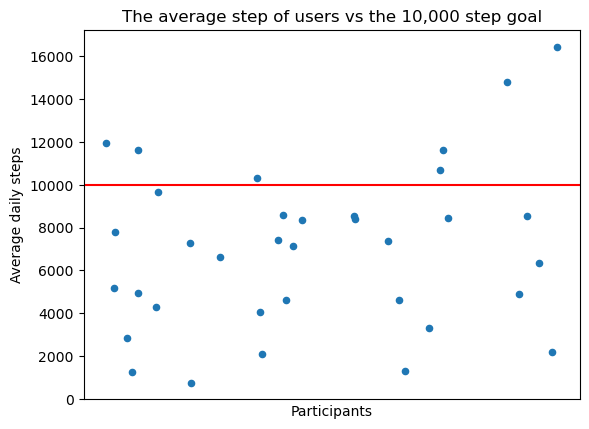

In [91]:


average_steps.plot.scatter(x='Id', y='Average_steps')
plt.axhline(y = 10000, color = 'r', linestyle = '-')
plt.xlabel("Participants")
plt.ylabel("Average daily steps")
plt.title("The average step of users vs the 10,000 step goal")
plt.tick_params(labelbottom = False, bottom = False)
plt.show()
          


    

In [45]:
###Part 3 statistical testing 
##bringing down previous dataframes for ease
goal_reached
activity_levels


,Id,TotalSteps,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes
0,1503960366,13162,25,13,328,728
1,1503960366,10735,21,19,217,776
2,1503960366,10460,30,11,181,1218
3,1503960366,9762,29,34,209,726
4,1503960366,12669,36,10,221,773
...,...,...,...,...,...,...
1392,8877689391,23014,70,29,359,982
1393,8877689391,16470,90,9,289,1052
1394,8877689391,28497,128,46,211,1055
1395,8877689391,10622,18,7,225,1190


In [47]:
###getting comparing activity populations and chi squared) 
def activity_user_type(TotalSteps):
    if TotalSteps < 5000:
        return "sedentary"
    elif 5000 <= TotalSteps <7500:
        return "lightly active"
    elif 7500 <= TotalSteps <10000:
        return "fairly active"
    else:
        return "very active"
average_steps['Activity User Type'] = average_steps['Average_steps'].apply(activity_user_type)
print(average_steps)




            Id  Average_steps Activity User Type
0   1503960366   11935.780000        very active
1   1624580081    5167.200000     lightly active
2   1644430081    7780.925000      fairly active
3   1844505072    2876.023256          sedentary
4   1927972279    1269.069767          sedentary
5   2022484408   11595.093023        very active
6   2026352035    4960.139535          sedentary
7   2320127002    4276.372093          sedentary
8   2347167796    9647.121212      fairly active
9   2873212765    7299.255814     lightly active
10  2891001357     773.625000          sedentary
11  3372868164    6616.933333     lightly active
12  3977333714   10321.523810        very active
13  4020332650    4049.761905          sedentary
14  4057192912    2103.972222          sedentary
15  4319703577    7422.813953     lightly active
16  4388161847    8595.692308      fairly active
17  4445114986    4632.369565          sedentary
18  4558609924    7154.930233     lightly active
19  4702921684    83

In [97]:
###create poputions of user type
count_type = average_steps['Activity User Type'].value_counts().reset_index()
count_type.columns = ['Activity User Type', 'total']

count_type

## percentages
count_type['totals'] = count_type['total'].sum()
count_type['percent'] = count_type['total']/count_type['totals']
count_type


,Activity User Type,total,totals,percent
0,sedentary,13,35,0.371429
1,fairly active,8,35,0.228571
2,very active,7,35,0.200000
3,lightly active,7,35,0.200000


Notation:
The level of activity has been broken down into step ranges. Below 5,000 steps a day is considered sedentary. Between 5,000 and 7,500 is considered lightly active. Between 7,500-10,000, is considered fairly active. And very active is determined as those who exceeded 10,000 steps. 
The total collumn shows the number of participants whose average steps fell into each category. Sedentary users with less than 5000 steps were the largest population at 37% of participants. The other categories present near even results, with 1 more person performing fairly active step counts than very active and lightly active. Given the almost even spread of people in step categories, except for the sedentary people, a chi-square test can determine whether the larger number of sedentary users is a significantly different result from an even spread of user step activity. 

Alternative hypothesis: User showed a preference for a certain level of activity type.


Null hypothesis: differences seen in user type can be accounted for by random distribution.

In [99]:
##Statistical test- is the variation in activity levels by step a chance distribution, or is there significant variation in sample activity levels by step?
count_type[1] = 8.75
count_type
count_type.columns = ["Activity User Type", "total", "totals", "percentage", "expected"]
count_type

,Activity User Type,total,totals,percentage,expected
0,sedentary,13,35,0.371429,8.75
1,fairly active,8,35,0.228571,8.75
2,very active,7,35,0.200000,8.75
3,lightly active,7,35,0.200000,8.75


In [77]:
##CHI-SQUARE
import scipy.stats as stats
critical_value = stats.chi2.ppf(q = 0.95, df = 3)
critical_value

7.814727903251179

In [79]:
stats.chisquare(count_type['total'], count_type['expected'])

Power_divergenceResult(statistic=2.828571428571429, pvalue=0.4188181226463754)

Chi-square results
the pvalue is greater than 5% and the chi-square values is lower than than the critical value. 
In this case, the variation seen (most clearly in the number of people categorised as sedentary) was not significantly different from an even spread of participants across activity levels, with the variation occurring by chance around 41.9% of the time. This suggests that the activity level of participants is random, accepting the null hypothesis. 

### Comparison of sample population with Australian popupulation

According to the Australian Bureau of Statis,a National Health Survey between 2011-2012 yielded the following percentages of the population falling under theses categories. 
Sedentary = 21%
lightly active = 35%
fairly active= 28%
very active = 15%



In [139]:
##Making a df for Australian bureau if applied to the same number of participants 
##rounded the numbers up to make 35, as the percentages given only make up 99%
observed = pd.Series([7.4, 12.3, 10, 5.3], index= ["sedentary", "lightly active", "fairly active", "active"])
AB_df = pd.DataFrame([observed]).T
AB_df[1] = 8.75
AB_df.columns = ["observed", "expected"]
AB_df

,observed,expected
sedentary,7.4,8.75
lightly active,12.3,8.75
fairly active,10.0,8.75
active,5.3,8.75


In [141]:
critical_value = stats.chi2.ppf(q = 0.95, df = 3)
critical_value

7.814727903251179

In [143]:
stats.chisquare(AB_df['observed'], AB_df['expected'])

Power_divergenceResult(statistic=3.187428571428572, pvalue=0.36362027847809164)

Notation:
Again the chi-square value is lower than the critical value, and the p-value is greater than 5%, showing that the different activity levels of the Australian population in this study did not vary significantly from an even distribution. 

### Percentage comparison of fitbit users and Australian Bureau 

In [153]:
#This_study = pd.Series([37, 20, 23, 20]), index= ["sedentary", "lightly active", "fairly active", "very active"]
#Percentage_comparison = pd.DataFrame([This_study]).T
#Percentage_comparison['Australian Bureau'] = [21, 35, 28,15]
#percentage_comparison
This_study = {'Fitbit sample (%)': pd.Series([37,20,23,20], 
                                         index=['sedentary', 'lightly active', 'fairly active', 'very active']),
              'Australian Bureau (%)': pd.Series([21, 35, 28, 15],
                                             index=['sedentary', 'lightly active', 'fairly active', 'very active'])}
Percentage_df = pd.DataFrame(This_study)
print(Percentage_df)



                Fitbit sample (%)  Australian Bureau (%)
sedentary                      37                     21
lightly active                 20                     35
fairly active                  23                     28
very active                    20                     15


Notation: Fitbit sample shows a greater percentage of sedentary users. Australian Bureau shows a greater number of lightly to fairly active people, with a small percentage performing lower for very active fitbit users. Overall, both distributions do not statistically vary from an even distribution. This suggests that the data obtained in this study is similar to that of the Australian population, with both showing a fairly even spread of activity levels. This is especially shown if you add up the fairly active and very active people across both populations, seeing that in both cases a category of fairly active to very active people made up 43% of the sample size, and the general Australian population. 

## Final Conclusions

How appropriate or achievable is the companies 10,000 step goal?
Overall, 10,000 steps appears to be an occassionally achievable goal, with the majority of users meeting the goal at least once. However, achieving this goal daily proved difficult, with just 20% managing consistent levels of active to very active steps. 

Did the fitbit users favour a steps bracket, or did they show even distribution in terms of activity?
Fitbit user activity levels by step did not vary significantly from an even distribution, showing that the fitbit users were not statistically more active or less active, and tended to have a fairly even spread across activity levels. 

How did fitbit activity levels by step compare with the Australian general popuplation?
Both Fitbit users and The general population appear to have a fairly even distribution of sedentary, active, fairly active, and very active people. This suggests that the step metric of activity is a good metric for measuring general activity, but does not suggest that purchasing a fitbit increased the populations general fitness in the time that the study was carried out.

Future considerations regarding Fitbit marketting and steps:
In order to encourage users to exercise more and to set FitBit users a part from the general population, Fitbit should utilise gradual goal increases with regards to the individual users' base fitness. By making goals more incremental, more user's might show improvement. Advertising that an increase in your steps of 500-1000 per week until you reach the 10,000 goal, could be another strategy to provoke user engagment.
Fitbit should also assess how to keep people engaged with their step count, as consistency of use showed huge variance and goals were difficult to maintain on a regular basis. For those that generally exceed the goal, FitBit may also want to consider additional features or rewards that will keep them wanting to track their step take. 

